### AUTHOR : VAISHNAV KRISHNA P
### DATASET SOURCE : https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data
### ABOUT THE DATSET : Our dataset comprises thousands of images captured from various sources, featuring individuals in diverse settings while wearing or not wearing face masks. Each image is meticulously labeled to indicate the presence or absence of a face mask, enabling our deep learning model to accurately distinguish between the two states. With this extensive dataset, we ensure robust training and validation, leading to a highly accurate and reliable face mask detection system. Our commitment to quality data empowers our model to perform effectively across different scenarios, contributing to the enhancement of public health and safety measures worldwide.

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:00<00:00, 156MB/s]
100% 163M/163M [00:01<00:00, 169MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3613.jpg', 'with_mask_1714.jpg', 'with_mask_2349.jpg', 'with_mask_1765.jpg', 'with_mask_966.jpg']
['with_mask_3020.jpg', 'with_mask_259.jpg', 'with_mask_620.jpg', 'with_mask_472.jpg', 'with_mask_1425.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2140.jpg', 'without_mask_2074.jpg', 'without_mask_1116.jpg', 'without_mask_1820.jpg', 'without_mask_1565.jpg']
['without_mask_780.jpg', 'without_mask_2705.jpg', 'without_mask_1165.jpg', 'without_mask_3409.jpg', 'without_mask_3770.jpg']


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


### CREATING LABEL
* 1 - WITH MASK
* 0 - WITHOUT MASK

In [13]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

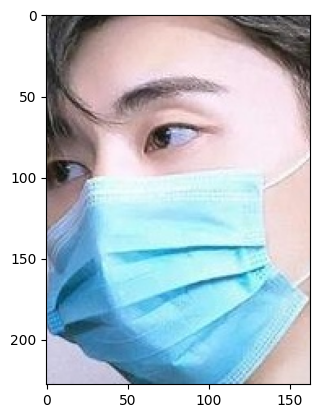

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

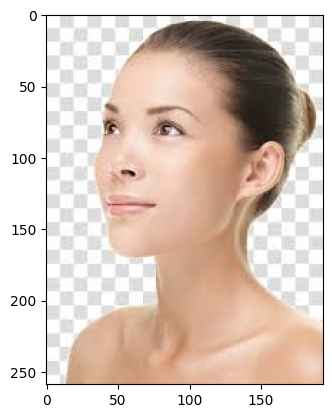

In [18]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

### IMAGE PROCESSING
1. Resize the Images

2. Convert the images to numpy arrays

In [19]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

array([[[251, 250, 248],
        [247, 246, 244],
        [245, 244, 242],
        ...,
        [181, 183, 195],
        [162, 164, 176],
        [147, 149, 161]],

       [[248, 247, 245],
        [251, 250, 248],
        [251, 250, 248],
        ...,
        [143, 145, 157],
        [139, 142, 153],
        [136, 139, 151]],

       [[241, 240, 238],
        [245, 245, 243],
        [245, 244, 242],
        ...,
        [142, 146, 156],
        [153, 156, 166],
        [159, 165, 174]],

       ...,

       [[254, 254, 254],
        [195, 195, 195],
        [207, 207, 207],
        ...,
        [236, 236, 236],
        [214, 214, 214],
        [215, 215, 215]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [255, 255, 255]]], dtype=uint8)
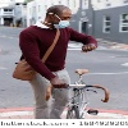

In [22]:
data[0]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:

type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 22,  22,  20],
        [ 18,  20,  19],
        [ 20,  21,  24],
        ...,
        [141, 153, 175],
        [133, 145, 166],
        [126, 142, 160]],

       [[ 23,  24,  25],
        [ 19,  20,  21],
        [ 18,  21,  25],
        ...,
        [130, 143, 160],
        [129, 143, 160],
        [121, 137, 152]],

       [[ 25,  27,  31],
        [ 22,  26,  30],
        [ 23,  27,  33],
        ...,
        [112, 125, 136],
        [115, 129, 140],
        [116, 130, 143]],

       ...,

       [[  1,   2,   5],
        [  0,   1,   4],
        [  2,   3,   5],
        ...,
        [104,  55,  49],
        [ 99,  42,  33],
        [ 90,  29,  18]],

       [[  1,   2,   6],
        [  1,   2,   6],
        [  2,   3,   6],
        ...,
        [105,  49,  43],
        [105,  44,  36],
        [ 94,  34,  23]],

       [[  2,   3,   7],
        [  2,   3,   7],
        [  2,   3,   7],
        ...,
        [113,  52,  48],
        [110,  47,  38],
        [ 97,  37,  26]]], dtype=uint8)
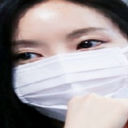

In [33]:
X_train[0]

In [34]:
X_train_scaled[0]

array([[[0.08627451, 0.08627451, 0.07843137],
        [0.07058824, 0.07843137, 0.0745098 ],
        [0.07843137, 0.08235294, 0.09411765],
        ...,
        [0.55294118, 0.6       , 0.68627451],
        [0.52156863, 0.56862745, 0.65098039],
        [0.49411765, 0.55686275, 0.62745098]],

       [[0.09019608, 0.09411765, 0.09803922],
        [0.0745098 , 0.07843137, 0.08235294],
        [0.07058824, 0.08235294, 0.09803922],
        ...,
        [0.50980392, 0.56078431, 0.62745098],
        [0.50588235, 0.56078431, 0.62745098],
        [0.4745098 , 0.5372549 , 0.59607843]],

       [[0.09803922, 0.10588235, 0.12156863],
        [0.08627451, 0.10196078, 0.11764706],
        [0.09019608, 0.10588235, 0.12941176],
        ...,
        [0.43921569, 0.49019608, 0.53333333],
        [0.45098039, 0.50588235, 0.54901961],
        [0.45490196, 0.50980392, 0.56078431]],

       ...,

       [[0.00392157, 0.00784314, 0.01960784],
        [0.        , 0.00392157, 0.01568627],
        [0.00784314, 0

**Building a Convolutional Neural Networks (CNN)**

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [37]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 12s 24ms/step - loss: 0.4903 - acc: 0.7844 - val_loss: 0.2782 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.3074 - acc: 0.8823 - val_loss: 0.2303 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 4s 25ms/step - loss: 0.2435 - acc: 0.9095 - val_loss: 0.2286 - val_acc: 0.8926
Epoch 4/5
170/170 [==============================] - 4s 22ms/step - loss: 0.2052 - acc: 0.9224 - val_loss: 0.1805 - val_acc: 0.9240
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1717 - acc: 0.9334 - val_loss: 0.1737 - val_acc: 0.9256


In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1809 - acc: 0.9265
Test Accuracy = 0.9265387058258057


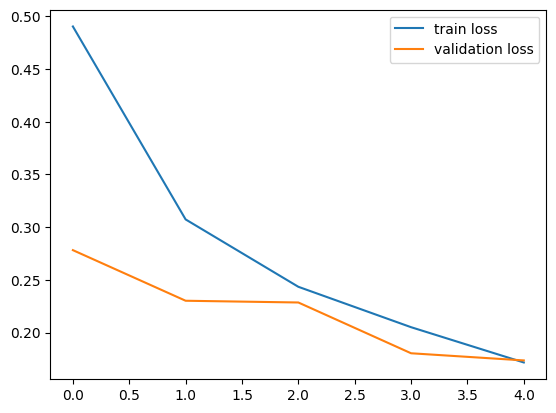

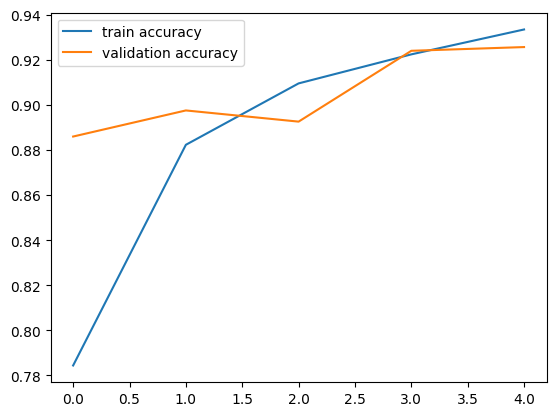

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


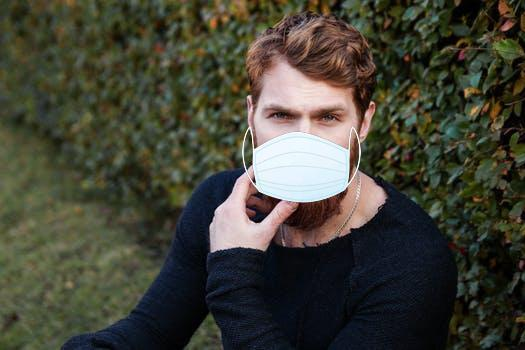

1/1 [==============================] - 0s 490ms/step
[[0.37045386 0.5250032 ]]
1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')